# Part 1 Reading the dataset

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:


col=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","target"]
df_train=pd.read_csv("../content/adult.data",names=col,index_col=False)
df_test=pd.read_csv("../content/adult.test",names=col,index_col=False)

In [ ]:
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


# Part 2 Data Prepration

In [ ]:
df_train=df_train.replace('?',np.NaN)

In [ ]:
df_test=df_test.replace('?',np.NaN)

In [ ]:
df_train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [ ]:
df_test.isna().sum()

age               0
workclass         1
fnlwgt            1
education         1
education-num     1
marital-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
target            1
dtype: int64

In [ ]:
df_test=df_test.dropna()

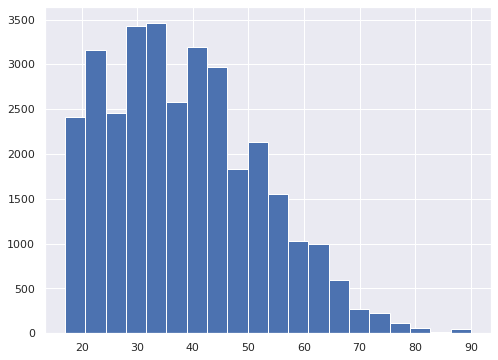

In [ ]:
sns.set(rc={"figure.figsize":(8, 6)})
df_train['age'].hist(bins=20)

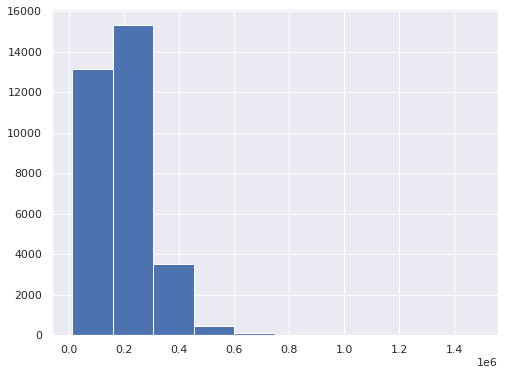

In [ ]:
df_train['fnlwgt'].hist(bins=10)

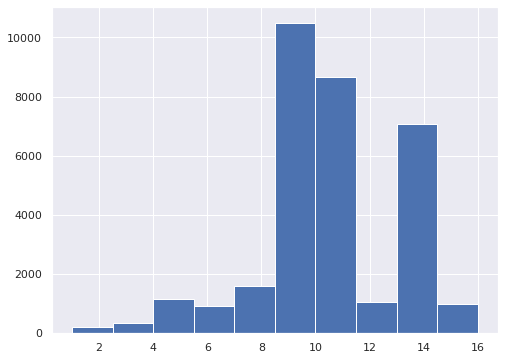

In [ ]:
df_train['education-num'].hist(bins=10)

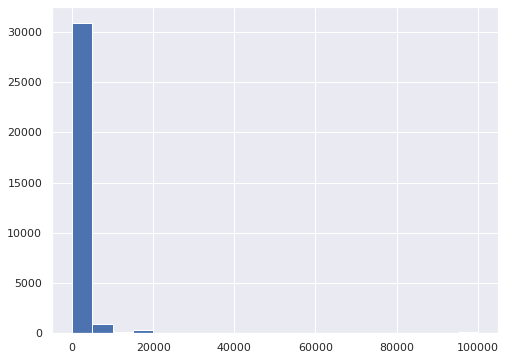

In [ ]:
df_train['capital-gain'].hist(bins=20)

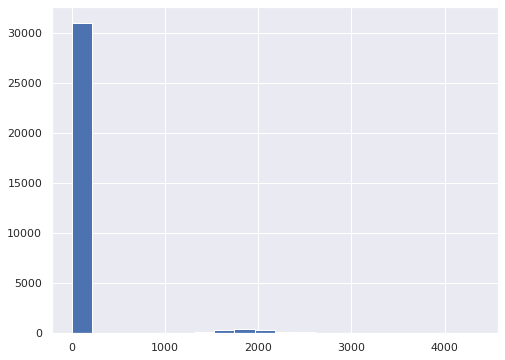

In [ ]:
df_train['capital-loss'].hist(bins=20)

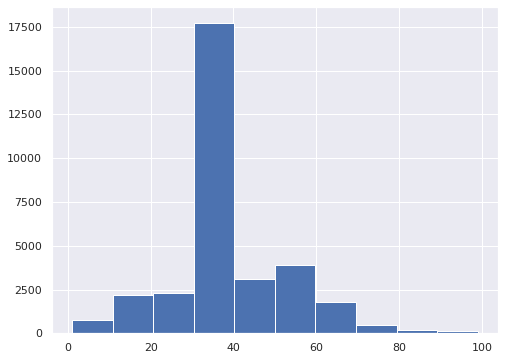

In [ ]:
df_train['hours-per-week'].hist(bins=10)

In [ ]:
le =LabelEncoder()
df_train[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','target']]=df_train[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','target']].apply(LabelEncoder().fit_transform)
df_test[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','target']]=df_test[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','target']].apply(LabelEncoder().fit_transform)

In [ ]:
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [ ]:
df_train.target.value_counts()

0    24720
1     7841
Name: target, dtype: int64

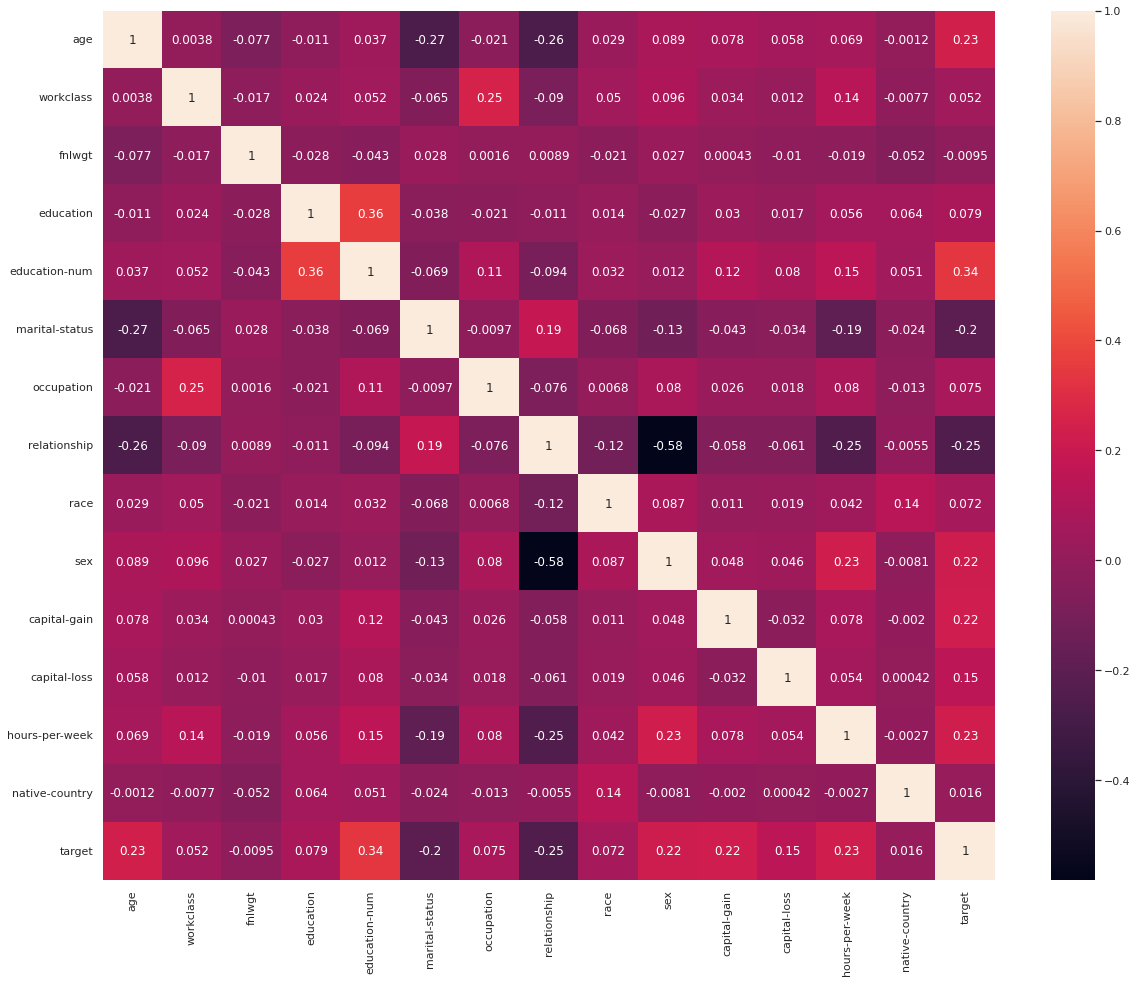

In [ ]:
matrix = df_train.corr()
sns.set(rc={"figure.figsize":(20, 16)})
sns.heatmap(matrix, annot=True)
plt.show()

The attributes "fnlwgt" and "native-country" have very less corelation with the target. Therefore we will be removing them from the dataset


In [ ]:
df_train=df_train.drop(["fnlwgt","native-country"],axis=1)
df_test=df_test.drop(["fnlwgt","native-country"],axis=1)
df_train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,39,7,9,13,4,1,1,4,1,2174,0,40,0
1,50,6,9,13,2,4,0,4,1,0,0,13,0
2,38,4,11,9,0,6,1,4,1,0,0,40,0
3,53,4,1,7,2,6,0,2,1,0,0,40,0
4,28,4,9,13,2,10,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,0,0,38,0
32557,40,4,11,9,2,7,0,4,1,0,0,40,1
32558,58,4,11,9,6,1,4,4,0,0,0,40,0
32559,22,4,11,9,4,1,3,4,1,0,0,20,0


In [ ]:
df_train.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.455960,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,4.000000,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
df_train.duplicated().sum()

3804

In [ ]:
df_train=df_train.drop_duplicates(keep= 'first')
df_train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,39,7,9,13,4,1,1,4,1,2174,0,40,0
1,50,6,9,13,2,4,0,4,1,0,0,13,0
2,38,4,11,9,0,6,1,4,1,0,0,40,0
3,53,4,1,7,2,6,0,2,1,0,0,40,0
4,28,4,9,13,2,10,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,4,12,14,2,4,0,4,1,0,0,40,1
32555,22,4,15,10,4,11,1,4,1,0,0,40,0
32556,27,4,7,12,2,13,5,4,0,0,0,38,0
32558,58,4,11,9,6,1,4,4,0,0,0,40,0


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

1135

In [ ]:
df_test=df_test.drop_duplicates(keep= 'first')
df_test

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
1,25,4,1,7.0,4,7,3,2,1,0.0,0.0,40.0,0
2,38,4,11,9.0,2,5,0,4,1,0.0,0.0,50.0,0
3,28,2,7,12.0,2,11,0,4,1,0.0,0.0,40.0,1
4,44,4,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,1
5,18,0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,4,9,13.0,0,10,1,4,0,0.0,0.0,36.0,0
16278,64,0,11,9.0,6,0,2,2,1,0.0,0.0,40.0,0
16279,38,4,9,13.0,2,10,0,4,1,0.0,0.0,50.0,0
16280,44,4,9,13.0,0,1,3,1,1,5455.0,0.0,40.0,0


In [ ]:
df_test.duplicated().sum()

0

In [ ]:
x=df_train.iloc[:,:12]
y=df_train.iloc[:,12]

test_x=df_test.iloc[:,:12]
test_y=df_test.iloc[:,12]

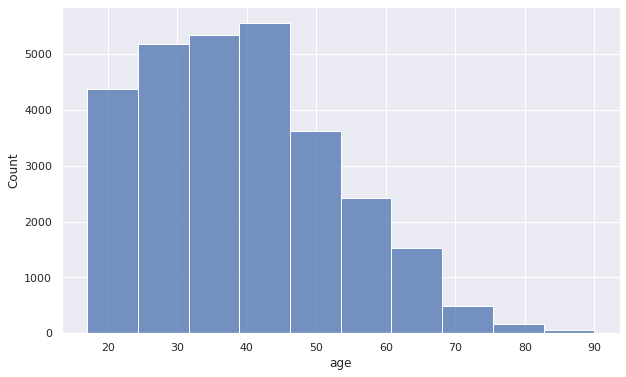

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x['age'],bins=10)

20-30

30-40

40-50

50-70

70+

In [ ]:
x_age=x['age']
x_age=list(x_age)
age_cat=[]
for i in range(len(x_age)):
  if x_age[i]<30:
    age_cat.append(0)
  elif x_age[i]<40:
    age_cat.append(1)
  elif x_age[i]<50:
    age_cat.append(2)
  elif x_age[i]<70:
    age_cat.append(3)
  else:
    age_cat.append(4)


In [ ]:
age_cat=pd.DataFrame(age_cat)
age_cat.value_counts()
age_cat.columns=["age_cat"]

In [ ]:
x.index=[''] * len(x)
age_cat.index=[''] * len(age_cat)
x=x.drop(['age'],axis=1)
x=pd.concat([x,age_cat],axis=1)
x

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,age_cat
,7,9,13,4,1,1,4,1,2174,0,40,1
,6,9,13,2,4,0,4,1,0,0,13,3
,4,11,9,0,6,1,4,1,0,0,40,1
,4,1,7,2,6,0,2,1,0,0,40,3
,4,9,13,2,10,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
,4,12,14,2,4,0,4,1,0,0,40,3
,4,15,10,4,11,1,4,1,0,0,40,0
,4,7,12,2,13,5,4,0,0,0,38,0
,4,11,9,6,1,4,4,0,0,0,40,3


In [ ]:
x_age=test_x['age']
x_age=list(x_age)
age_cat=[]
for i in range(len(x_age)):
  if int(x_age[i])<30:
    age_cat.append(0)
  elif int(x_age[i])<40:
    age_cat.append(1)
  elif int(x_age[i])<50:
    age_cat.append(2)
  elif int(x_age[i])<70:
    age_cat.append(3)
  else:
    age_cat.append(4)


In [ ]:
age_cat=pd.DataFrame(age_cat)
age_cat.value_counts()
age_cat.columns=["age_cat"]

In [ ]:
test_x.index=[''] * len(test_x)
age_cat.index=[''] * len(age_cat)
test_x=test_x.drop(['age'],axis=1)
test_x=pd.concat([test_x,age_cat],axis=1)
test_x

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,age_cat
,4,1,7.0,4,7,3,2,1,0.0,0.0,40.0,0
,4,11,9.0,2,5,0,4,1,0.0,0.0,50.0,1
,2,7,12.0,2,11,0,4,1,0.0,0.0,40.0,0
,4,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,2
,0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
,4,9,13.0,0,10,1,4,0,0.0,0.0,36.0,1
,0,11,9.0,6,0,2,2,1,0.0,0.0,40.0,3
,4,9,13.0,2,10,0,4,1,0.0,0.0,50.0,1
,4,9,13.0,0,1,3,1,1,5455.0,0.0,40.0,2


In [ ]:
test_x.index=[''] * len(test_x)
x.index=[''] * len(x)

In [ ]:
x1=x.drop(['workclass','education','marital-status','occupation','relationship','race','sex',"age_cat"],axis=1)
x2=x[['workclass','education','marital-status','occupation','relationship','race','sex',"age_cat"]]

In [ ]:
x3=test_x.drop(['workclass','education','marital-status','occupation','relationship','race','sex',"age_cat"],axis=1)
x4=test_x[['workclass','education','marital-status','occupation','relationship','race','sex',"age_cat"]]

In [ ]:
scaler = StandardScaler()



col=df_train.columns
col=["education-num","capital-gain","capital-loss","hours-per-week"]

x1 = pd.DataFrame(scaler.fit_transform(x1), columns =col)
x3 = pd.DataFrame(scaler.transform(x3), columns =col)

x1.index=[''] * len(x1)
x3.index=[''] * len(x3)


In [ ]:
x=pd.concat([x1,x2],axis=1)
x=pd.DataFrame(x)
x

,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,age_cat
,1.092674,0.123059,-0.230605,-0.051098,7,9,4,1,1,4,1,1
,1.092674,-0.154865,-0.230605,-2.162564,6,9,2,4,0,4,1,3
,-0.417528,-0.154865,-0.230605,-0.051098,4,11,0,6,1,4,1,1
,-1.172630,-0.154865,-0.230605,-0.051098,4,1,2,6,0,2,1,3
,1.092674,-0.154865,-0.230605,-0.051098,4,9,2,10,5,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
,1.470225,-0.154865,-0.230605,-0.051098,4,12,2,4,0,4,1,3
,-0.039978,-0.154865,-0.230605,-0.051098,4,15,4,11,1,4,1,0
,0.715123,-0.154865,-0.230605,-0.207503,4,7,2,13,5,4,0,0
,-0.417528,-0.154865,-0.230605,-0.051098,4,11,6,1,4,4,0,3


In [ ]:
test_x=pd.concat([x3,x4],axis=1)
test_x=pd.DataFrame(test_x)
test_x

,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,age_cat
,-1.172630,-0.154865,-0.230605,-0.051098,4,1,4,7,3,2,1,0
,-0.417528,-0.154865,-0.230605,0.730927,4,11,2,5,0,4,1,1
,0.715123,-0.154865,-0.230605,-0.051098,2,7,2,11,0,4,1,0
,-0.039978,0.827967,-0.230605,-0.051098,4,15,2,7,0,2,1,2
,-0.039978,-0.154865,-0.230605,-0.833123,0,15,4,0,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
,1.092674,-0.154865,-0.230605,-0.363908,4,9,0,10,1,4,0,1
,-0.417528,-0.154865,-0.230605,-0.051098,0,11,6,0,2,2,1,3
,1.092674,-0.154865,-0.230605,0.730927,4,9,2,10,0,4,1,1
,1.092674,0.542501,-0.230605,-0.051098,4,9,0,1,3,1,1,2


In [ ]:
def plot_me(dt,cg):
  plt.figure(figsize=(15,6))
  a1=df_train[df_train['target']==0][cg].value_counts() 
  a2=df_train[df_train['target']==1][cg].value_counts() 
  plt.subplot(1,2,1)
  plt.title('Salary below 50K')
  sns.barplot(a1.index,a1.values)
  plt.subplot(1,2,2)
  plt.title('Salary Above 50K')
  sns.barplot(a2.index,a2.values)
  plt.show()

workclass  ; 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


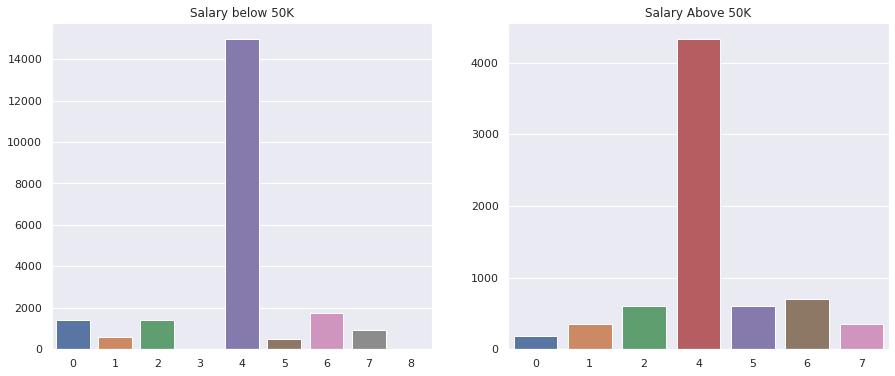

education  ; 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


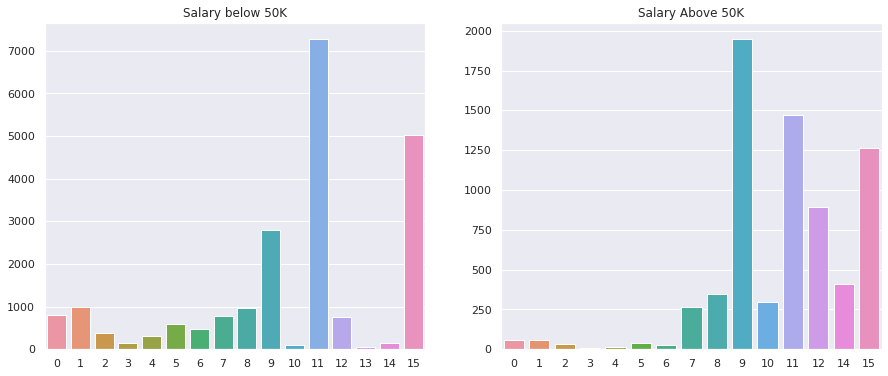

marital-status  ; 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


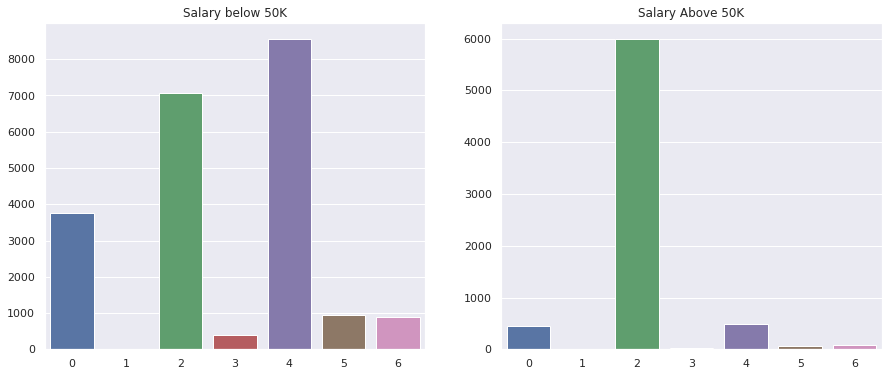

occupation  ; 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


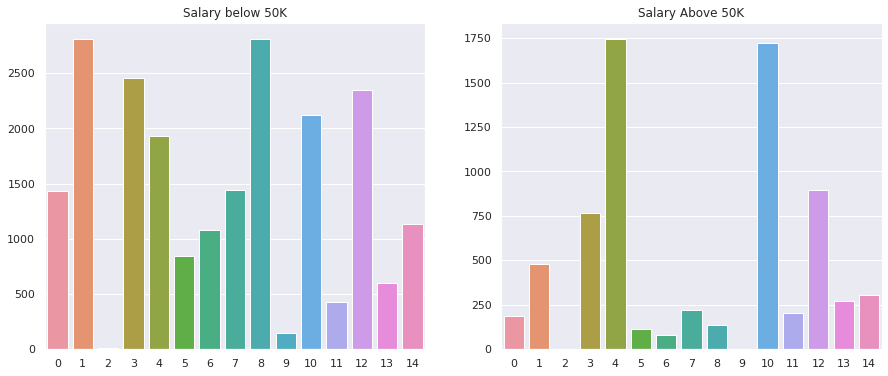

relationship  ; 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


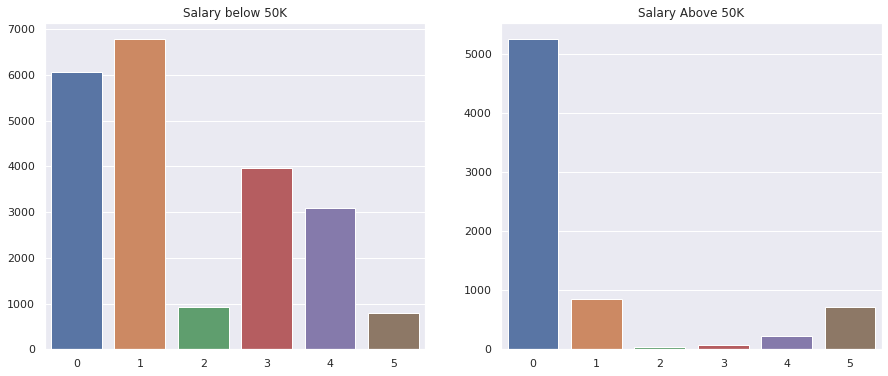

race  ; 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


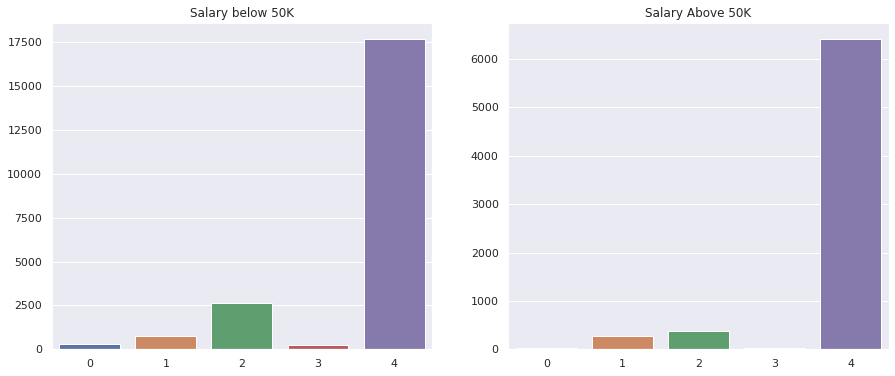

sex  ; 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


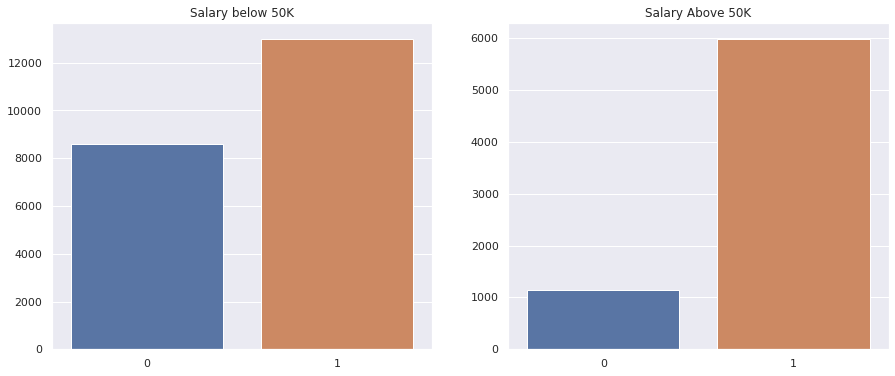

age  ; 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


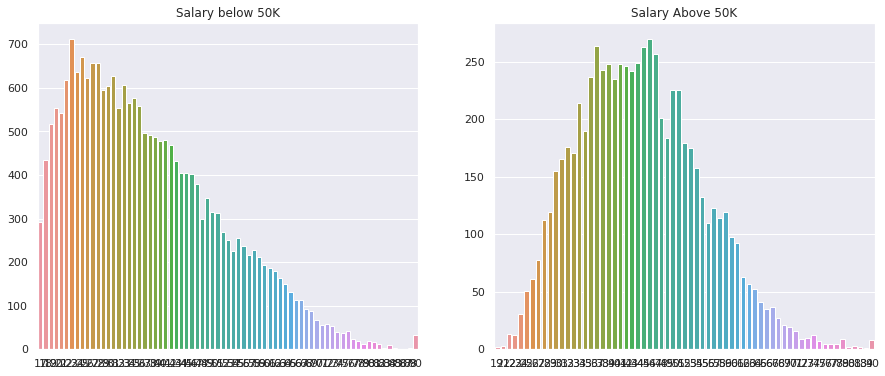

education-num  ; 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


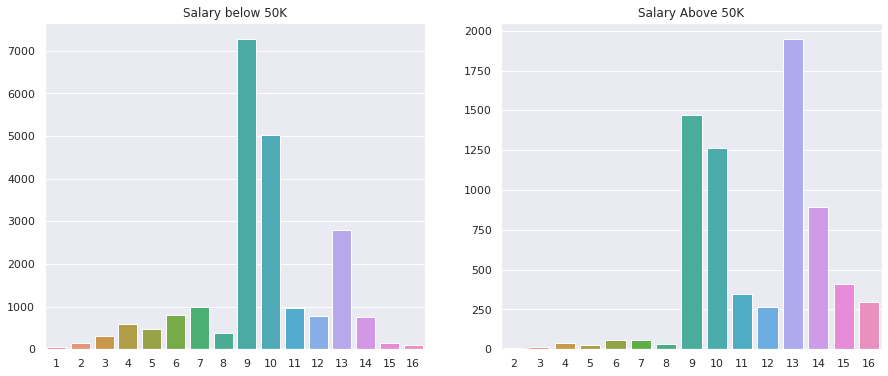

hours-per-week  ; 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


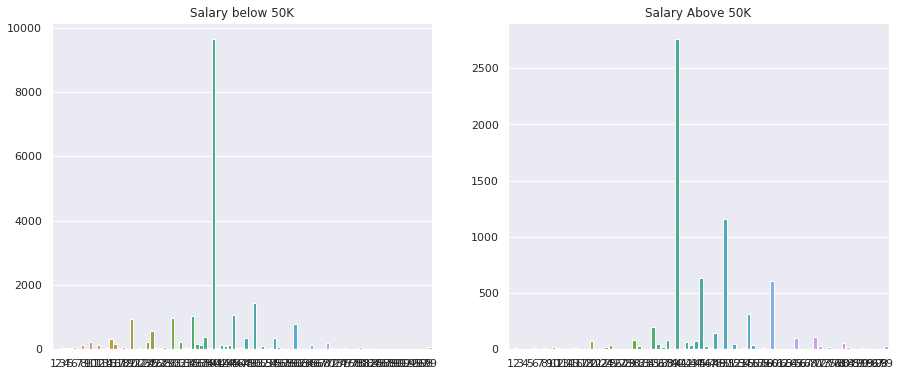

In [ ]:
l=['workclass','education','marital-status','occupation','relationship','race','sex',"age","education-num","hours-per-week"]
for i in l:
  print(i,' ; ')
  plot_me(df_train,i)

## Part 3 Model selection and training

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [ ]:
-from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred=model_lr.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      9656
           1       0.46      0.73      0.57      1847

    accuracy                           0.82     11503
   macro avg       0.70      0.78      0.73     11503
weighted avg       0.86      0.82      0.84     11503



In [ ]:
accuracy_score(y_pred,y_test)

0.8210032165522038

In [ ]:
confusion_matrix(y_test,y_pred)

array([[8098,  501],
       [1558, 1346]])

In [ ]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_pred=model_rf.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      8850
           1       0.64      0.71      0.67      2653

    accuracy                           0.84     11503
   macro avg       0.78      0.79      0.78     11503
weighted avg       0.85      0.84      0.84     11503



In [ ]:
accuracy_score(y_pred,y_test)

0.842215074328436

In [ ]:
confusion_matrix(y_test,y_pred)

array([[7817,  782],
       [1033, 1871]])

In [ ]:
model_ada = AdaBoostClassifier(n_estimators=50)
model_ada.fit(x_train,y_train)
y_pred=model_ada.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.90      9184
           1       0.61      0.76      0.68      2319

    accuracy                           0.85     11503
   macro avg       0.77      0.82      0.79     11503
weighted avg       0.87      0.85      0.86     11503



In [ ]:
accuracy_score(y_pred,y_test)

0.8529948709032427

In [ ]:
confusion_matrix(y_test,y_pred)

array([[8046,  553],
       [1138, 1766]])

In [ ]:
model_svc = SVC()
model_svc.fit(x_train,y_train)
y_pred=model_svc.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      9838
           1       0.45      0.79      0.58      1665

    accuracy                           0.83     11503
   macro avg       0.71      0.81      0.74     11503
weighted avg       0.89      0.83      0.85     11503



In [ ]:
accuracy_score(y_pred,y_test)

0.8316091454403199

In [ ]:
confusion_matrix(y_test,y_pred)

array([[8250,  349],
       [1588, 1316]])

In [ ]:
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_pred=model_knn.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      8982
           1       0.57      0.66      0.61      2521

    accuracy                           0.82     11503
   macro avg       0.74      0.76      0.75     11503
weighted avg       0.83      0.82      0.82     11503



In [ ]:
accuracy_score(y_pred,y_test)

0.8173519951317048

In [ ]:
confusion_matrix(y_test,y_pred)

array([[7740,  859],
       [1242, 1662]])

for the test dataset created by us we got a max accuracy of 85.2 for adaboost model. Therefore we will be training adaboost model and tune the hyper parameters to get the max possible acuracy for the model.

## Part 4 Hyperparamter Tuning

In [ ]:
grid = dict()
grid['n_estimators'] = [10,30,50,100,300,500]
grid['learning_rate'] = [0.001,0.01, 0.1, 1.0]

grid_search = GridSearchCV(estimator=model_ada, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy')

In [ ]:
grid_result = grid_search.fit(x_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.863626 using {'learning_rate': 1.0, 'n_estimators': 500}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean %f and std (%f) with: %r" % (mean, stdev, param))

mean 0.754724 and std (0.000133) with: {'learning_rate': 0.001, 'n_estimators': 10}
mean 0.761562 and std (0.013743) with: {'learning_rate': 0.001, 'n_estimators': 30}
mean 0.761562 and std (0.013743) with: {'learning_rate': 0.001, 'n_estimators': 50}
mean 0.782717 and std (0.014113) with: {'learning_rate': 0.001, 'n_estimators': 100}
mean 0.790020 and std (0.001143) with: {'learning_rate': 0.001, 'n_estimators': 300}
mean 0.790020 and std (0.001143) with: {'learning_rate': 0.001, 'n_estimators': 500}
mean 0.782717 and std (0.014113) with: {'learning_rate': 0.01, 'n_estimators': 10}
mean 0.790020 and std (0.001143) with: {'learning_rate': 0.01, 'n_estimators': 30}
mean 0.790020 and std (0.001143) with: {'learning_rate': 0.01, 'n_estimators': 50}
mean 0.794193 and std (0.001516) with: {'learning_rate': 0.01, 'n_estimators': 100}
mean 0.820331 and std (0.010546) with: {'learning_rate': 0.01, 'n_estimators': 300}
mean 0.833952 and std (0.002284) with: {'learning_rate': 0.01, 'n_estimators

## Part 5 Results

In [ ]:
model_ada = AdaBoostClassifier(n_estimators=500,learning_rate=1)
model_ada.fit(x,y)
y_pred=model_ada.predict(test_x)

In [ ]:
print("The accuracy of the model is",accuracy_score(y_pred,test_y)*100)
print("The recall of the model is",metrics.recall_score(y_pred,test_y)*100)
print("The precision of the model is",metrics.precision_score(y_pred,test_y)*100)
print("The f1score of the model is",metrics.f1_score(y_pred,test_y)*100)

The accuracy of the model is 86.76878383731679
The recall of the model is 76.8900627269726
The precision of the model is 64.10679878887971
The f1score of the model is 69.91894326028219


In [ ]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     12117
           1       0.64      0.77      0.70      3029

    accuracy                           0.87     15146
   macro avg       0.79      0.83      0.81     15146
weighted avg       0.88      0.87      0.87     15146



In [ ]:
cf=confusion_matrix(test_y,y_pred)
cf

array([[10813,   700],
       [ 1304,  2329]])

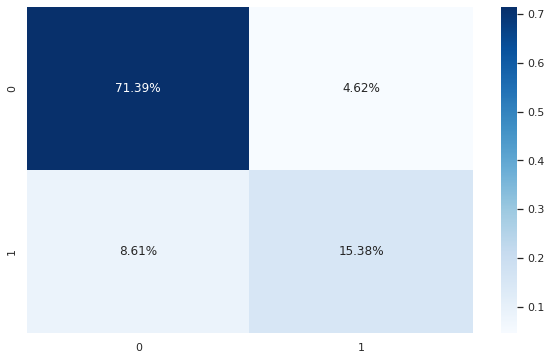

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cf/np.sum(cf), annot=True,fmt='.2%', cmap='Blues')